In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# 1 Data Preparation

In [2]:
digits = load_digits()
X = digits.data
Y = digits.target

In [3]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


0


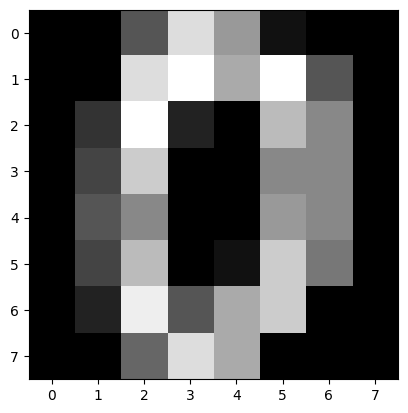

In [4]:
plt.imshow(X[0].reshape(8,8), cmap='gray')
print(Y[0])
plt.show()

In [5]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [6]:
# as the values are discrete we shoult apply multinomial naive bayes ideally

# Train model

In [7]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [8]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [9]:
mnb.fit(X,Y)

MultinomialNB()

In [10]:
gnb.fit(X,Y)

GaussianNB()

In [11]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


Multinomial gave the high accuracy as the  features are discrete values not continuous

In [12]:
cross_val_score(gnb, X, Y , scoring= 'accuracy', cv = 10).mean()

0.8113904407200497

In [13]:
cross_val_score(mnb, X, Y, scoring= 'accuracy', cv = 10).mean()

0.8797858472998138

In [14]:
# as the each feature have discrete values and hence multinomial gives better result

In [16]:
from sklearn.metrics import confusion_matrix
Y_mnb = mnb.predict(X)
cnf = confusion_matrix(Y, Y_mnb)
cnf

array([[175,   0,   0,   0,   3,   0,   0,   0,   0,   0],
       [  0, 137,  14,   0,   0,   1,   2,   0,  13,  15],
       [  0,   7, 160,   0,   0,   0,   0,   0,   8,   2],
       [  0,   0,   2, 159,   0,   2,   0,   5,   8,   7],
       [  1,   0,   0,   0, 173,   0,   0,   4,   3,   0],
       [  0,   0,   0,   0,   1, 157,   1,   1,   2,  20],
       [  0,   2,   0,   0,   1,   1, 176,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   1,   0],
       [  0,  11,   1,   0,   1,   0,   1,   1, 154,   5],
       [  0,   1,   0,   1,   1,   1,   0,  11,   7, 158]], dtype=int64)

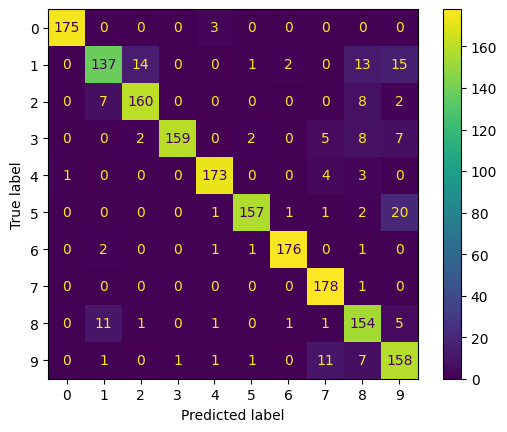

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cnf)
disp.plot()
